# **Project: Image Classification with CNN on CIFAR-10 Dataset**

**1. Problem Statement**

The goal of this project is to build a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset into one of 10 categories: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, or truck. The model should achieve a high accuracy by processing the images and identifying patterns related to the object categories.

**2. Dataset Used**

*   Dataset Name: CIFAR-10
*   Source: CIFAR-10 dataset on TensorFlow
*   Size:
  *   60,000 images: 50,000 for training and 10,000 for testing
  *   10 classes
*   Image Dimensions: 32x32 pixels, RGB color (3 channels)
*   Classes:
  *  	Airplane
  *   Automobile
  *   Bird
  *   Cat
  *   Deer
  *   Dog
  *   Frog
  *   Horse
  *   Ship
  *   Truck

**3. Implementation and Code**

Step 1: Import Libraries



In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Step 2: Load and Preprocess the Dataset

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


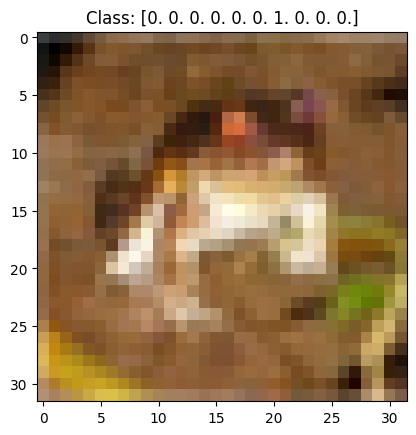

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the image pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Display a sample image from the dataset
plt.imshow(x_train[0])
plt.title(f"Class: {y_train[0]}")
plt.show()

Step 3: Build the CNN Model

In [3]:
model = models.Sequential([
    # Convolutional layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Convolutional layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Convolutional layer 3
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the 3D output to 1D
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation='relu'),

    # Output layer (10 classes)
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summarize the model architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Step 4: Train the Model

In [4]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 89ms/step - accuracy: 0.3271 - loss: 1.8127 - val_accuracy: 0.5560 - val_loss: 1.2598
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.5585 - loss: 1.2392 - val_accuracy: 0.6046 - val_loss: 1.1129
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.6253 - loss: 1.0582 - val_accuracy: 0.6393 - val_loss: 1.0181
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.6612 - loss: 0.9667 - val_accuracy: 0.6516 - val_loss: 0.9993
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.6907 - loss: 0.8820 - val_accuracy: 0.6750 - val_loss: 0.9303
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 90ms/step - accuracy: 0.7138 - loss: 0.8172 - val_accuracy: 0.6898 - val_loss: 0.8965
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 89ms/step - accuracy: 0.7328 - loss: 0.7670 - val_accuracy: 0.6926 - val_loss: 0.8941
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 93ms/step - accuracy: 0.7498 - loss: 0.7150 - 

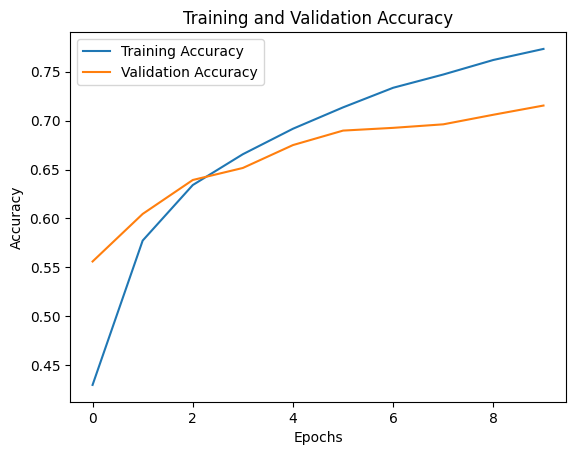

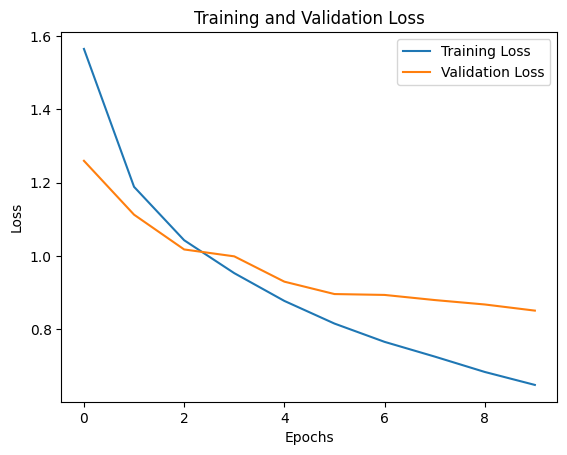

In [5]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Step 5: Evaluate the Model

In [6]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7184 - loss: 0.8481
Test Accuracy: 0.715399980545044


Step 6: Make Predictions and Visualize

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


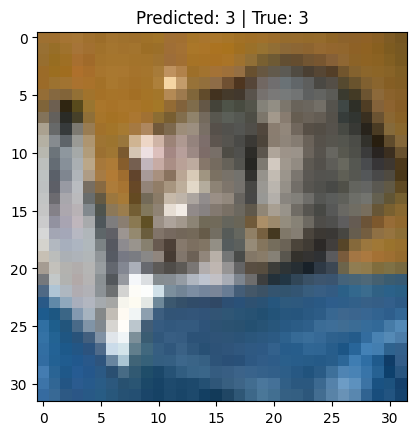

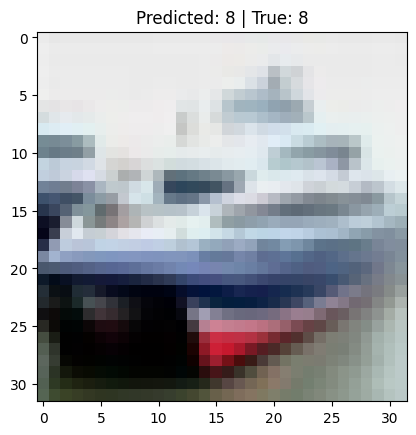

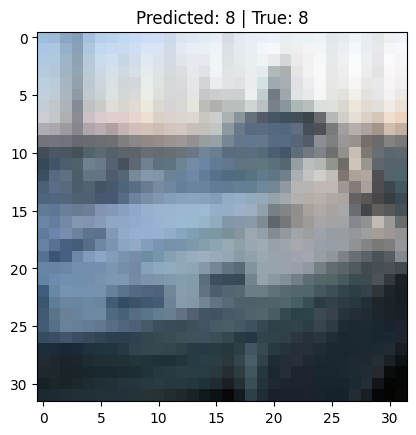

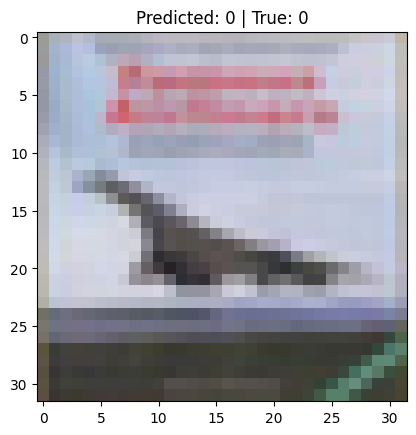

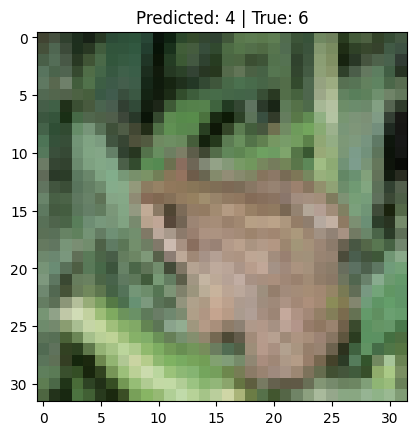

In [7]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Display a few test images with predicted labels
for i in range(5):
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {predictions[i].argmax()} | True: {y_test[i].argmax()}")
    plt.show()

**4. Result**

After training the CNN model on the CIFAR-10 dataset, you should see an accuracy improvement over several epochs. The final test accuracy should ideally be around 70-80% (depending on hyperparameters, augmentation, etc.).

**Results and Insights:**

* 	The model performs well at recognizing objects from the CIFAR-10 dataset.
*   Possible future improvements:
  *   Data augmentation (e.g., random rotations, flips) to improve generalization.
  *   Using a deeper network (e.g., ResNet or VGG) for better performance.
